In [34]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.973684210526


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.947368421053


In [9]:
from sklearn.cross_validation import cross_val_score

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print scores

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [11]:
print scores.mean()

0.966666666667


In [19]:
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring ='accuracy')
    k_scores.append(scores.mean())
print k_scores

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


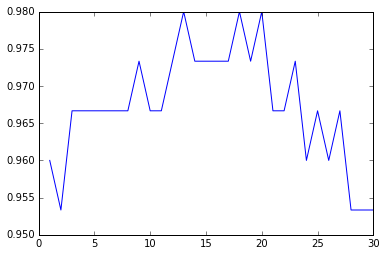

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)

In [21]:
knn = KNeighborsClassifier(n_neighbors=20)
print cross_val_score(knn, X, y, cv=10, scoring = 'accuracy').mean()

0.98


In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logreg = LogisticRegression()
print cross_val_score(logreg, X, y, cv=10, scoring ='accuracy').mean()

0.953333333333


# cross-validation in feature selection

In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

In [7]:
url  = 'http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv'
data = pd.read_csv(url)

In [8]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
feature_cols = ['TV', 'Radio', 'Newspaper']

In [10]:
X = data[feature_cols]
y = data.Sales

In [14]:
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring = 'mean_squared_error')

In [15]:
print scores

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [16]:
mse_scores = -scores
print mse_scores

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [20]:
rmse_scores = np.sqrt(mse_scores)
print rmse_scores

[ 1.88689808  1.81595022  1.44548731  1.68069713  1.14139187  1.31971064
  2.85891276  1.45399362  1.7443426   1.56614748]


In [21]:
print rmse_scores.mean()

1.69135317081


In [28]:
X = data[['TV', 'Radio']]

In [29]:
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring = 'mean_squared_error')
print scores

[-3.38264572 -3.28736055 -2.09185507 -2.81784389 -1.27311083 -1.74391853
 -8.0006111  -2.07650936 -3.03635301 -2.4289835 ]


In [30]:
mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)
rmse_scores.mean()

1.6796748419090766

In [31]:
from sklearn.cross_validation import cross_val_score


In [38]:
from sklearn.datasets import load_iris
iris = load_iris()

In [39]:
X = iris.data
y = iris.target

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring ='accuracy')
print scores

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [41]:
print scores.mean()

0.966666666667


In [43]:
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring = 'accuracy')
    k_scores.append(scores.mean())
print k_scores
    

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

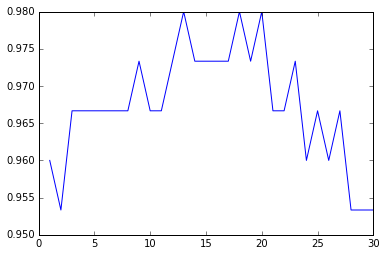

In [46]:
plt.plot(k_range, k_scores)

In [47]:
knn = KNeighborsClassifier(n_neighbors=20)
print cross_val_score(knn, X, y, cv = 10, scoring ='accuracy').mean()

0.98


In [48]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print cross_val_score(logreg, X, y, cv = 10, scoring = 'accuracy').mean()

0.953333333333


In [49]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [50]:
url  = 'http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv'
data = pd.read_csv(url)

In [51]:
feature_cols = ['TV', 'Newspaper', 'Radio']
X = data[feature_cols]
y = data.Sales

In [52]:
linreg  =  LinearRegression()
scores = cross_val_score(linreg, X, y, cv = 10, scoring = 'mean_squared_error')
print scores

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [53]:
mse = -scores
print mse

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [54]:
rmse = np.sqrt(mse)
print rmse

[ 1.88689808  1.81595022  1.44548731  1.68069713  1.14139187  1.31971064
  2.85891276  1.45399362  1.7443426   1.56614748]


In [55]:
print rmse.mean()

1.69135317081


In [76]:
X = data[['Radio', 'TV']]
y = data.Sales

In [77]:
scores = cross_val_score(linreg, X, y, cv = 10, scoring = 'mean_squared_error')
mse = -scores
rmse = np.sqrt(mse)
rmse.mean()

1.6796748419090766